In [515]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import *
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.svm import SVC
from keras.optimizers import Adam
import tensorflow as tf

In [550]:
# importing the dataset
data = pd.read_csv("C:\\Users\\or.hirshman\\Downloads\\WPy64-3771\\notebooks\\Data-science-projects\\data_sets\\titanic\\train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [551]:
#Remove id
del data['PassengerId']
del data['Name']
data.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C


In [552]:
# data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [553]:
# Describe data
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [554]:
# Check for Nulls
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [555]:
# The are almost the same unique tickets as passanger ids = 891
len(data.Ticket.unique())

681

In [556]:
# How many unique Cabins are?
len(data.Cabin.unique())

148

In [557]:
# There are many options of Cabin- lets split Cabin to rows and columns
data['Cabin_row'] = data['Cabin'].str[:1]
data['Cabin_column'] = data['Cabin'].str[1:]
display(len(data.Cabin_row.unique()))
display(len(data.Cabin_column.unique()))

#There are 9 unique Cabin rows- can be usable
# There are 102 unique Cabin columns - too much

del data['Cabin_column']
data

9

102

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_row
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,C
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,NaN,S,NaN
887,1,1,female,19.0,0,0,112053,30.0000,B42,S,B
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN
889,1,1,male,26.0,0,0,111369,30.0000,C148,C,C


In [558]:
#data.Cabin_column.unique()

In [559]:
#data.Cabin_row.unique()

In [560]:
#import re 
#temp = re.compile("([a-zA-Z]+)([0-9]+)") 
#res = temp.match(str(data['Cabin'].values).strip('[]')).groups() 

In [561]:
#es = re.findall(r'(\w+?)(\d+)', str(data['Cabin'].values))
#es

In [562]:
#str(data['Cabin'].values).strip('[]')

In [563]:
# Convert to numeric
#data['Cabin_column'] = pd.to_numeric(data.Cabin_column)
#data['Cabin_column'] 

In [564]:
# fill missing data
data.fillna(data.median(), inplace=True) 
data['Cabin'] = data['Cabin'].fillna('nan')
data['Cabin_row'] = data['Cabin_row'].fillna('nan')
data['Embarked'] = data['Embarked'].fillna('nan')

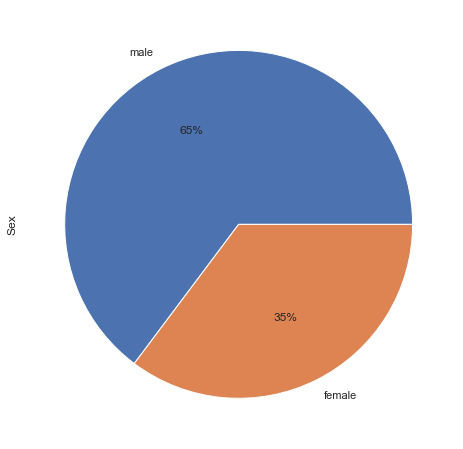

In [565]:
#How many females \ males?
data['Sex'].value_counts().plot(kind='pie', autopct='%1.0f%%')

#Much more men than women in the data

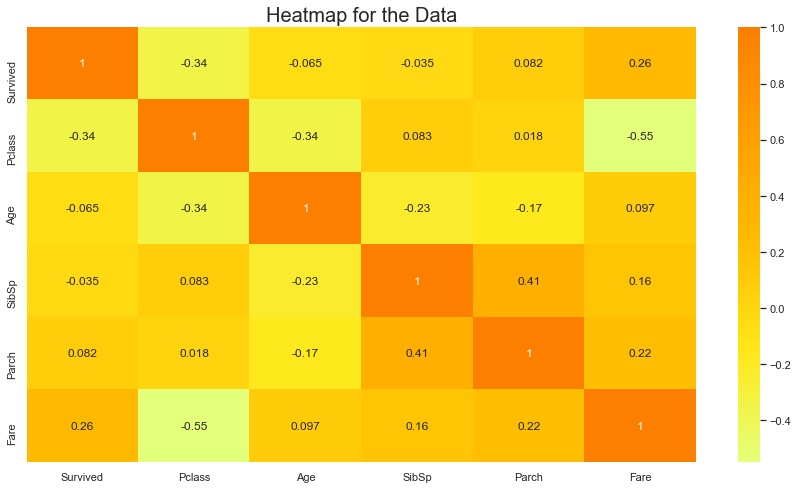

In [566]:
# Heatmap
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(data.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

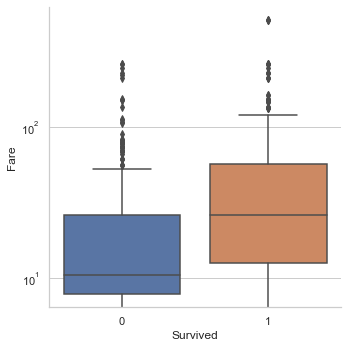

In [567]:
# Box plot Fare and Survived
box_plot_fare =sns.catplot(x="Survived", y="Fare",
            kind="box", dodge=False, data=data)
box_plot_fare.set(yscale="log")

# It seems that as the Fare is higher the survival rate increase

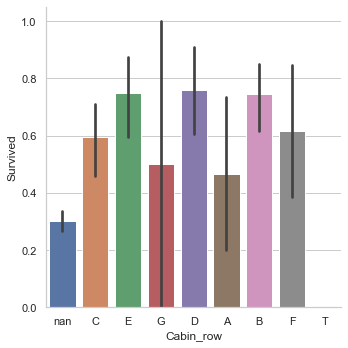

In [443]:
box_plot_fare_cabinrow = sns.catplot(x="Cabin_row", y="Survived", kind="bar", data=data)

# It seems that for cabin rows: B D E C the survival rate is higher than cabin rows: nan G A F
# And as the Pclass is lower the survival rate increase

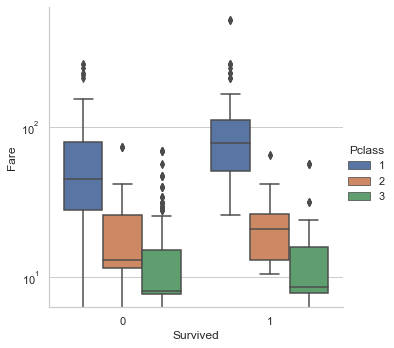

In [444]:
box_plot_fare_pclass = sns.catplot(x="Survived", y="Fare", hue="Pclass", kind="box", data=data)
box_plot_fare_pclass.set(yscale="log")

# As the Fare is higher the survival rate increase
# And as it is relevant only for first class

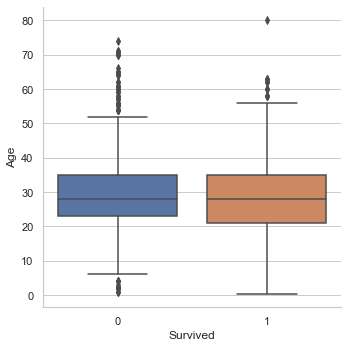

In [445]:
# Box plot Pclass and Survived
box_plot_age =sns.catplot(x="Survived", y="Age",
            kind="box", dodge=False, data=data)

# It seems that age is not correlated with survival rate

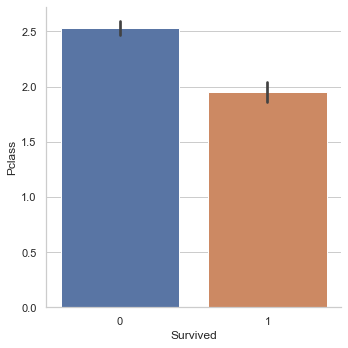

In [446]:
# Bar plot Pclass and Survived
bar_plot_pclass =sns.catplot(x="Survived", y="Pclass",
            kind="bar", dodge=False, data=data)

# It seems that as the Pclass is lower the survival rate increase

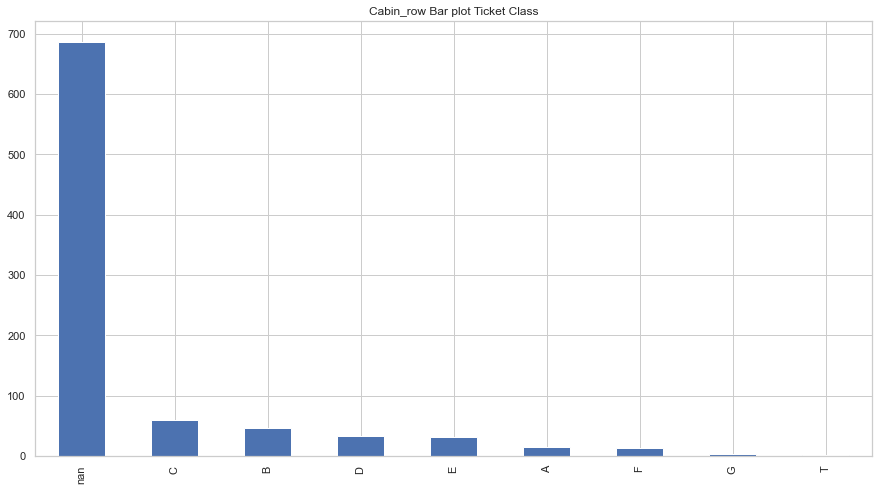

In [463]:
# Bar plot Cabin_row
data['Cabin_row'].value_counts().plot(kind='bar', title='Cabin_row Bar plot Ticket Class')

#Most Cabin rows are unknown, the common known are C B D E A 

[None]

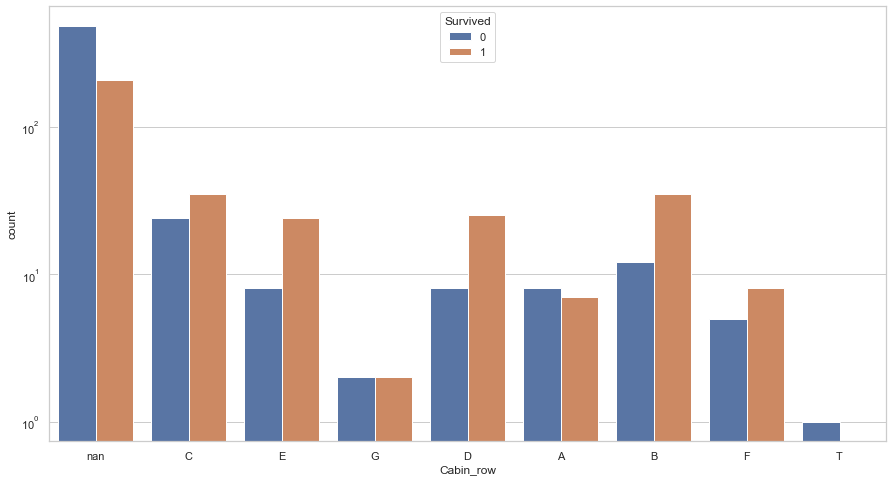

In [462]:
# Count plot Cabin_row
cabin_row_count_plot = sns.countplot(x="Cabin_row", hue="Survived", data=data)
cabin_row_count_plot.set(yscale="log")

# In cabin rows C, E, D, B the survival rate was higher than unknown, A, T, and G

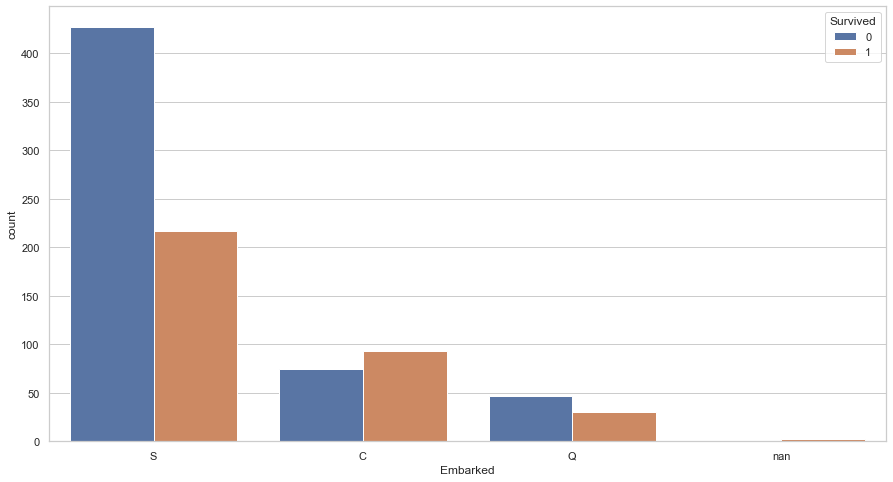

In [459]:
# Count plot Embarked
embarked_count_plot = sns.countplot(x="Embarked", hue="Survived", data=data)

# In unknown and Cherbourgthe survival rate was higher than Embarked Southampton and Queenstown

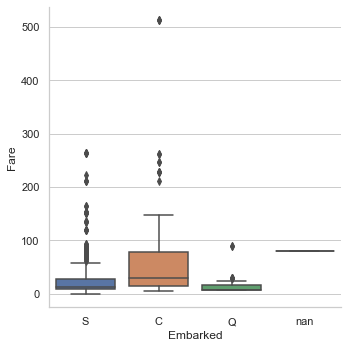

In [458]:
# Box plot Fare and Embarked
box_plot_embarked_fare =sns.catplot(x="Embarked", y="Fare",
            kind="box", dodge=False, data=data)
box_plot_fare.set(yscale="log")

# Cherbourgthe ticket costs more -> maybe related to their survival rate which was higher than the others

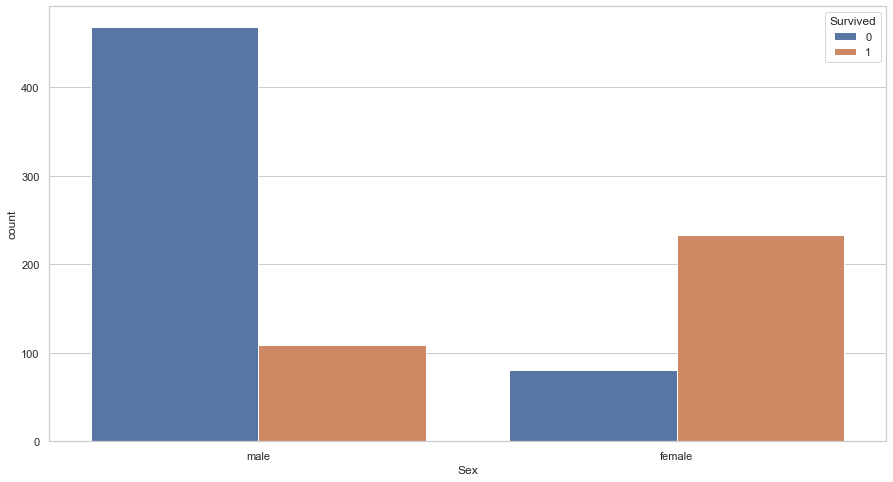

In [455]:
# Count plot Gender
sex_count_plot = sns.countplot(x="Sex", hue="Survived", data=data)

# Women survived more than men

In [ ]:
# Count plot Pclass
pclass_count_plot = sns.countplot(x="Pclass", hue="Survived", data=data)

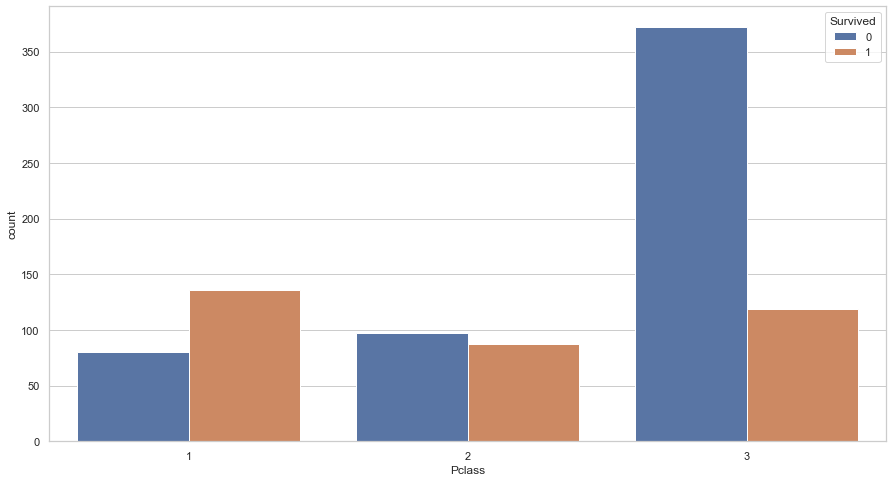

In [460]:
# Count plot Pclass
pclass_count_plot = sns.countplot(x="Pclass", hue="Survived", data=data)

#Pclass 3rd is significantly more popular than 1rd and 2rd
# Most of 3rd class died
#Only in 1st class there were more survivals than dead

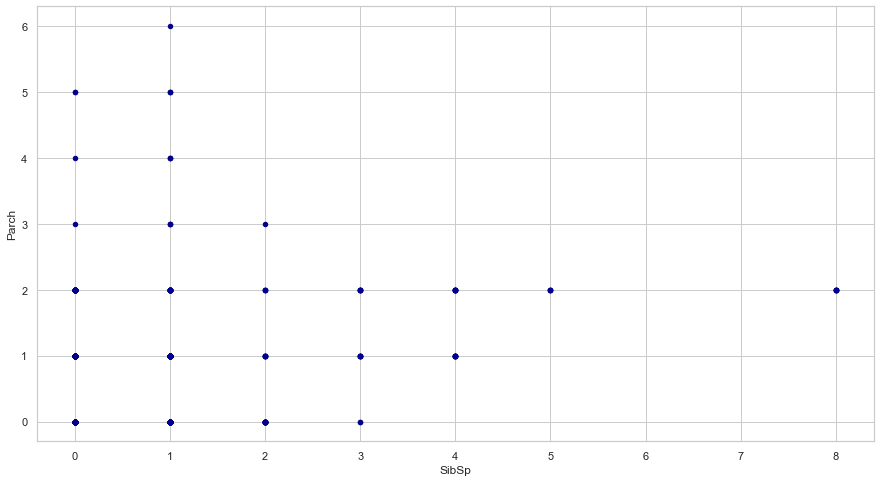

In [324]:
# Scatter plot of SibSp and Parch score
data.plot.scatter(x='SibSp', y='Parch', c='DarkBlue')

In [325]:
# Convert to categorical 
data['Sex'] = pd.Categorical(data.Sex)
data['Survived'] = pd.Categorical(data.Survived)
data['Cabin'] = pd.Categorical(data.Cabin)
data['Embarked'] = pd.Categorical(data.Embarked)

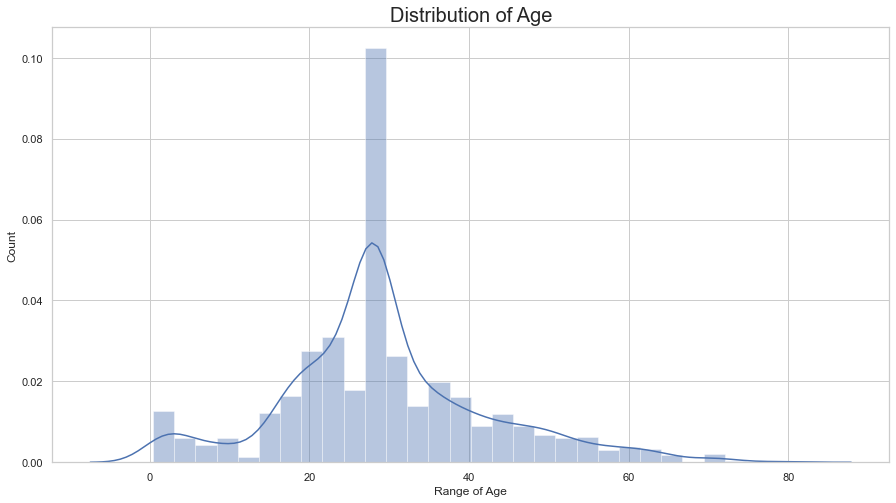

In [326]:
# Age histogram
plt.subplot(1, 1, 1)
sns.set(style = 'whitegrid')
sns.distplot(data['Age'])
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

# Most were about 20-30 years old

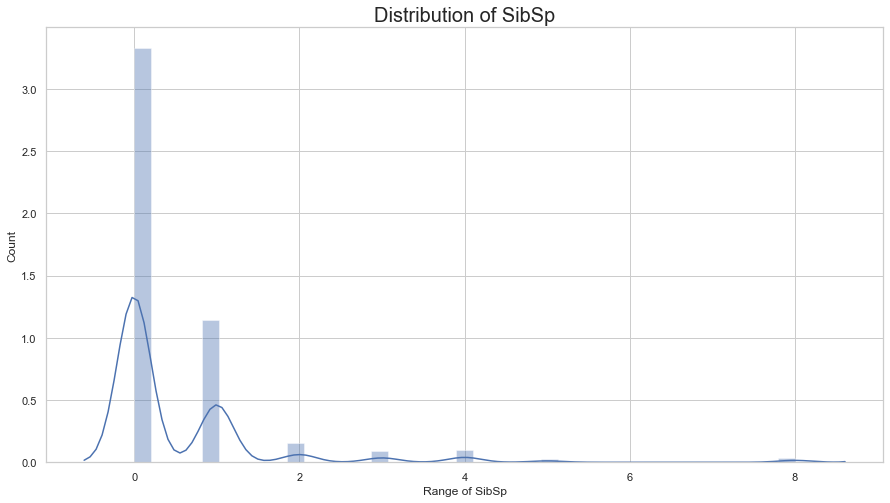

In [327]:
# SibSp histogram
plt.subplot(1, 1, 1)
sns.set(style = 'whitegrid')
sns.distplot(data['SibSp'])
plt.title('Distribution of SibSp', fontsize = 20)
plt.xlabel('Range of SibSp')
plt.ylabel('Count')
plt.show()

# Number of siblings is Heavy-tailed to the right

C:\Users\or.hirshman\Downloads\WPy64-3771\python-3.7.7.amd64\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


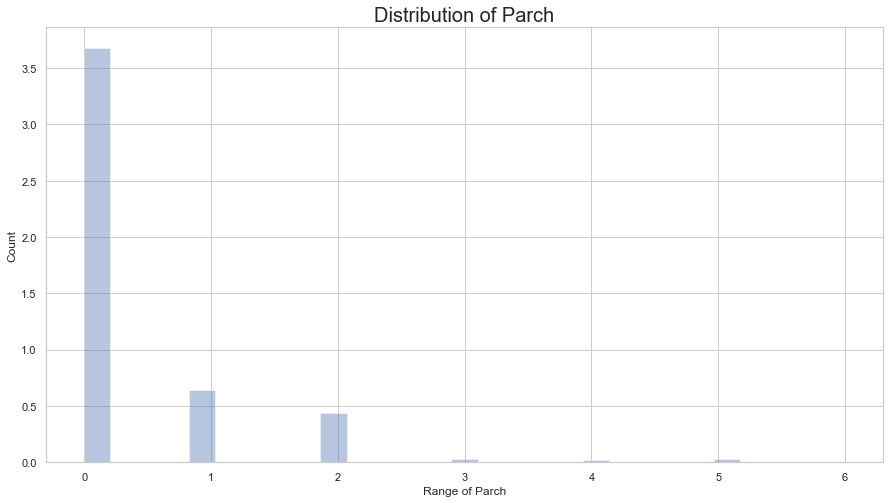

In [328]:
# Parch histogram
plt.subplot(1, 1, 1)
sns.set(style = 'whitegrid')
sns.distplot(data['Parch'])
plt.title('Distribution of Parch', fontsize = 20)
plt.xlabel('Range of Parch')
plt.ylabel('Count')
plt.show()

# Number of parents is Heavy-tailed to the right

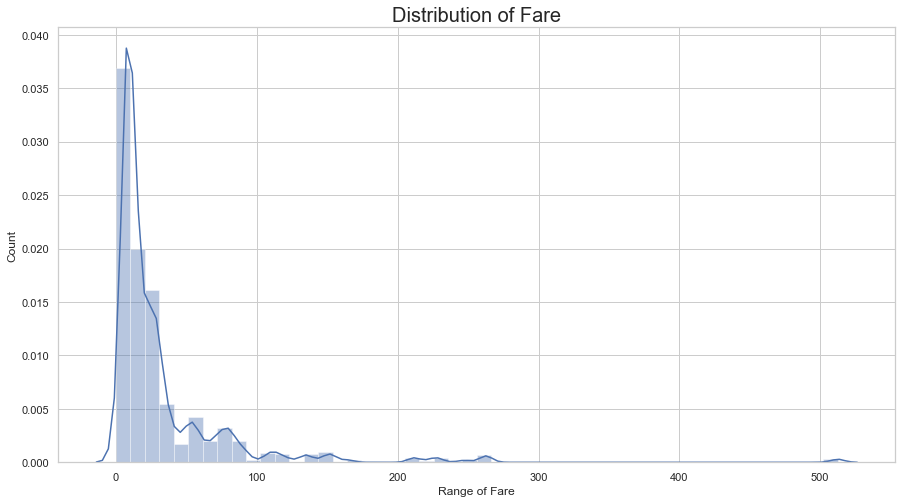

In [329]:
# Fare histogram
plt.subplot(1, 1, 1)
sns.set(style = 'whitegrid')
sns.distplot(data['Fare'])
plt.title('Distribution of Fare', fontsize = 20)
plt.xlabel('Range of Fare')
plt.ylabel('Count')
plt.show()

# Fare is Heavy-tailed to the right - most of the people purchased the ticket in low price

In [568]:
# Create dummy variables for all categorical
dummy_sex = pd.get_dummies(data['Sex'])
data = pd.concat([data, dummy_sex], axis=1)

dummy_cabin_row = pd.get_dummies(data['Cabin_row'])
data = pd.concat([data, dummy_cabin_row], axis=1)

dummy_embarked = pd.get_dummies(data['Embarked'])
dummy_embarked.columns = ['Cherbourg','Queenstown', 'Southampton', 'nan']
data = pd.concat([data, dummy_embarked], axis=1)

del data['nan']
del data['Sex']
del data['Ticket']
del data['Cabin']
del data['Cabin_row']
del data['Embarked']
data

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,A,B,C,D,E,F,G,T,Cherbourg,Queenstown,Southampton
0,0,3,22.0,1,0,7.2500,0,1,0,0,0,0,0,0,0,0,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,0,1,0,0,0,0,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,0,0,0,0,0,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1,0,0,0,0,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1,0,0,0,0,0,0,0,0,0,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,1,0,0,0,0,0,0,0,0,1
888,0,3,28.0,1,2,23.4500,1,0,0,0,0,0,0,0,0,0,0,0,1
889,1,1,26.0,0,0,30.0000,0,1,0,0,1,0,0,0,0,0,1,0,0


In [569]:
# Split to training and validation sets
y= data['Survived']
X = data[data.columns[1:]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [570]:
display(len(X_train))
display(len(y_train))
display(len(X_test))
display(len(y_test))

623

623

268

268

In [484]:
# Cross validation with feature selecion fit model
def rfecv_fit(model, X, y):
    rfecv = RFECV(estimator=model, cv=5, scoring='accuracy')
    rfecv = rfecv.fit(X, y)
    display("Optimal number of features : %d" % rfecv.n_features_)
    plt.figure()
    plt.xlabel("Number of features selected")
    plt.ylabel("Cross validation score (nb of correct classifications)")
    plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
    plt.show()
    display(rfecv.grid_scores_[rfecv.n_features_])
    return rfecv

In [571]:
# Predict, predict probability and calculatr ROC AUC
def rfecv_predict(fitted_rfecv, X_test):
    #rfecv.predict_proba(X_test)

    predictions =fitted_rfecv.predict(X_test)
    probs = fitted_rfecv.predict_proba(X_test)[:, 1]
    predictions_40=[1 if i > 0.4 else 0 for i in probs]

    roc_value = roc_auc_score(y_test, predictions)
    print(roc_value)

'Optimal number of features : 15'

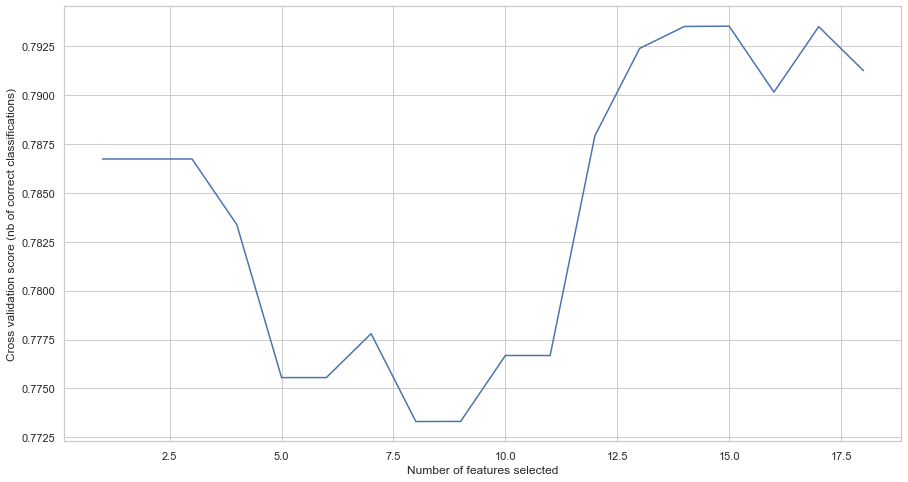

0.7901575544535812

In [528]:
##### Model 1: ##### logistic regression

logistic_reg = LogisticRegression(random_state=42, max_iter=2000)
rfecv_logistic = rfecv_fit(logistic_reg, X, y)

'Optimal number of features : 6'

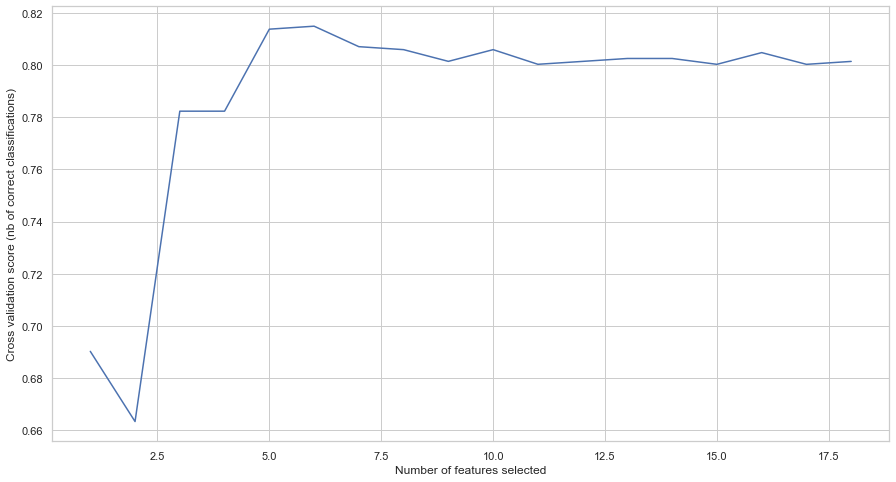

0.8070177641077144

In [527]:
##### Model 2: ##### Random Forest

randomForest = RandomForestClassifier(n_estimators=5000)
rfecv_forest = rfecv_fit(randomForest, X, y)

In [466]:
rfecv_predict(rfecv_forest,X_test)

AttributeError: 'NoneType' object has no attribute 'predict'

'Optimal number of features : 14'

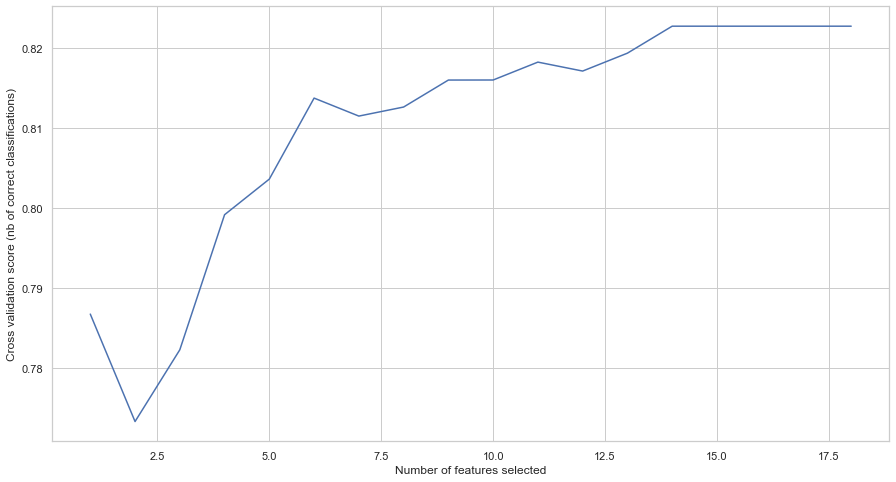

0.8227041616973196

In [465]:
##### Model 3: ##### XGBoost

xgb = XGBClassifier()
rfecv_xgb = rfecv_fit(xgb,X , y)

In [ ]:
# XGBoost with hyper parameters turning- worse
xgb_hyper = XGBClassifier(colsample_bytree = 0.6, gamma=3.4854056351319898, max_depth = 5, min_child_weight =7, reg_alpha=50, reg_lambda =  0.9110135475080738)
rfecv_xgb_hyper = rfecv_fit(xgb_hyper,X , y)

In [573]:
from sklearn.metrics import accuracy_score
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

SCORE:                                                                                                                 
0.664179104477612                                                                                                      
SCORE:                                                                                                                 
0.664179104477612                                                                                                      
SCORE:                                                                                                                 
0.664179104477612                                                                                                      
SCORE:                                                                                                                 
0.664179104477612                                                                                                      
SCORE:                                  

SCORE:                                                                                                                 
0.664179104477612                                                                                                      
SCORE:                                                                                                                 
0.8283582089552238                                                                                                     
SCORE:                                                                                                                 
0.664179104477612                                                                                                      
SCORE:                                                                                                                 
0.8171641791044776                                                                                                     
SCORE:                                  

SCORE:                                                                                                                 
0.664179104477612                                                                                                      
SCORE:                                                                                                                 
0.664179104477612                                                                                                      
SCORE:                                                                                                                 
0.8283582089552238                                                                                                     
SCORE:                                                                                                                 
0.8171641791044776                                                                                                     
SCORE:                                  

In [572]:
def objective(space):
    clf=XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [490]:
# Scale  data using StandardScaler 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=2)

In [491]:
##### Model 4: ##### neural network

input_dim = X_scaled_train.shape[1]
nn = Sequential()
nn.add(Dense(100,input_dim =input_dim, activation ='relu'))
nn.add(Dense(10, activation ='relu'))
nn.add(Dense(80, activation ='relu'))
nn.add(Dense(1,activation = 'sigmoid'))

#Compile Model 
nn.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy', metrics=['accuracy'])

#Fit model 
#rfecv_nn = rfecv_fit(nn,X_scaled , y)
nn.fit(X_scaled_train,y_train,epochs=800,batch_size=2)

Epoch 1/800
623/623 [==============================] - 0s 733us/step - loss: 0.6802 - accuracy: 0.5602
Epoch 2/800
623/623 [==============================] - 0s 517us/step - loss: 0.6149 - accuracy: 0.7753
Epoch 3/800
623/623 [==============================] - 0s 485us/step - loss: 0.5271 - accuracy: 0.7817
Epoch 4/800
623/623 [==============================] - 0s 475us/step - loss: 0.4679 - accuracy: 0.7913
Epoch 5/800
623/623 [==============================] - 0s 473us/step - loss: 0.4383 - accuracy: 0.8106
Epoch 6/800
623/623 [==============================] - 0s 480us/step - loss: 0.4224 - accuracy: 0.8138
Epoch 7/800
623/623 [==============================] - 0s 474us/step - loss: 0.4114 - accuracy: 0.8218
Epoch 8/800
623/623 [==============================] - 0s 467us/step - loss: 0.4043 - accuracy: 0.8250
Epoch 9/800
623/623 [==============================] - 0s 482us/step - loss: 0.3977 - accuracy: 0.8218
Epoch 10/800
623/623 [==============================] - 0s 465us/step - l

623/623 [==============================] - 0s 496us/step - loss: 0.2915 - accuracy: 0.8876
Epoch 80/800
623/623 [==============================] - 0s 469us/step - loss: 0.2924 - accuracy: 0.8892
Epoch 81/800
623/623 [==============================] - 0s 501us/step - loss: 0.2913 - accuracy: 0.8892
Epoch 82/800
623/623 [==============================] - 0s 593us/step - loss: 0.2900 - accuracy: 0.8844
Epoch 83/800
623/623 [==============================] - 0s 469us/step - loss: 0.2905 - accuracy: 0.8828
Epoch 84/800
623/623 [==============================] - 0s 559us/step - loss: 0.2894 - accuracy: 0.8941
Epoch 85/800
623/623 [==============================] - 0s 576us/step - loss: 0.2897 - accuracy: 0.8909
Epoch 86/800
623/623 [==============================] - 0s 466us/step - loss: 0.2878 - accuracy: 0.8892
Epoch 87/800
623/623 [==============================] - 0s 609us/step - loss: 0.2876 - accuracy: 0.8925
Epoch 88/800
623/623 [==============================] - 0s 566us/step - loss:

623/623 [==============================] - 0s 550us/step - loss: 0.2550 - accuracy: 0.8941
Epoch 158/800
623/623 [==============================] - 0s 637us/step - loss: 0.2537 - accuracy: 0.8973
Epoch 159/800
623/623 [==============================] - 0s 685us/step - loss: 0.2539 - accuracy: 0.8941
Epoch 160/800
623/623 [==============================] - 0s 554us/step - loss: 0.2543 - accuracy: 0.9005
Epoch 161/800
623/623 [==============================] - 0s 516us/step - loss: 0.2523 - accuracy: 0.89890s - loss: 0.2580 - accuracy: 0.89
Epoch 162/800
623/623 [==============================] - 0s 557us/step - loss: 0.2526 - accuracy: 0.8941
Epoch 163/800
623/623 [==============================] - 0s 533us/step - loss: 0.2503 - accuracy: 0.9005
Epoch 164/800
623/623 [==============================] - 0s 538us/step - loss: 0.2520 - accuracy: 0.8989
Epoch 165/800
623/623 [==============================] - 0s 539us/step - loss: 0.2510 - accuracy: 0.8989
Epoch 166/800
623/623 [============

623/623 [==============================] - 0s 535us/step - loss: 0.2290 - accuracy: 0.9021
Epoch 235/800
623/623 [==============================] - 0s 578us/step - loss: 0.2287 - accuracy: 0.9085
Epoch 236/800
623/623 [==============================] - 0s 530us/step - loss: 0.2296 - accuracy: 0.9021
Epoch 237/800
623/623 [==============================] - 0s 539us/step - loss: 0.2288 - accuracy: 0.9005
Epoch 238/800
623/623 [==============================] - 0s 550us/step - loss: 0.2273 - accuracy: 0.9069
Epoch 239/800
623/623 [==============================] - 0s 548us/step - loss: 0.2271 - accuracy: 0.9117
Epoch 240/800
623/623 [==============================] - 0s 540us/step - loss: 0.2279 - accuracy: 0.9037
Epoch 241/800
623/623 [==============================] - 0s 526us/step - loss: 0.2285 - accuracy: 0.9085
Epoch 242/800
623/623 [==============================] - 0s 539us/step - loss: 0.2248 - accuracy: 0.9069
Epoch 243/800
623/623 [==============================] - 0s 543us/ste

623/623 [==============================] - 0s 504us/step - loss: 0.2106 - accuracy: 0.9165
Epoch 312/800
623/623 [==============================] - 0s 491us/step - loss: 0.2120 - accuracy: 0.9133
Epoch 313/800
623/623 [==============================] - 0s 475us/step - loss: 0.2125 - accuracy: 0.9117
Epoch 314/800
623/623 [==============================] - 0s 494us/step - loss: 0.2095 - accuracy: 0.9165
Epoch 315/800
623/623 [==============================] - 0s 475us/step - loss: 0.2074 - accuracy: 0.9149
Epoch 316/800
623/623 [==============================] - 0s 479us/step - loss: 0.2113 - accuracy: 0.9149
Epoch 317/800
623/623 [==============================] - 0s 477us/step - loss: 0.2098 - accuracy: 0.9181
Epoch 318/800
623/623 [==============================] - 0s 476us/step - loss: 0.2123 - accuracy: 0.9037
Epoch 319/800
623/623 [==============================] - 0s 481us/step - loss: 0.2099 - accuracy: 0.9165
Epoch 320/800
623/623 [==============================] - 0s 474us/ste

623/623 [==============================] - 0s 498us/step - loss: 0.2044 - accuracy: 0.9133
Epoch 390/800
623/623 [==============================] - 0s 483us/step - loss: 0.1983 - accuracy: 0.9181
Epoch 391/800
623/623 [==============================] - 0s 480us/step - loss: 0.1995 - accuracy: 0.9149
Epoch 392/800
623/623 [==============================] - 0s 486us/step - loss: 0.2005 - accuracy: 0.9213
Epoch 393/800
623/623 [==============================] - 0s 510us/step - loss: 0.1958 - accuracy: 0.9149
Epoch 394/800
623/623 [==============================] - 0s 483us/step - loss: 0.2000 - accuracy: 0.9246
Epoch 395/800
623/623 [==============================] - 0s 466us/step - loss: 0.2019 - accuracy: 0.9181
Epoch 396/800
623/623 [==============================] - 0s 486us/step - loss: 0.1952 - accuracy: 0.9165
Epoch 397/800
623/623 [==============================] - 0s 473us/step - loss: 0.2023 - accuracy: 0.9165
Epoch 398/800
623/623 [==============================] - 0s 480us/ste

623/623 [==============================] - 0s 497us/step - loss: 0.1927 - accuracy: 0.9213
Epoch 468/800
623/623 [==============================] - 0s 475us/step - loss: 0.1898 - accuracy: 0.9197
Epoch 469/800
623/623 [==============================] - 0s 468us/step - loss: 0.1925 - accuracy: 0.9197
Epoch 470/800
623/623 [==============================] - 0s 502us/step - loss: 0.1915 - accuracy: 0.9165
Epoch 471/800
623/623 [==============================] - 0s 478us/step - loss: 0.1935 - accuracy: 0.9197
Epoch 472/800
623/623 [==============================] - 0s 467us/step - loss: 0.1921 - accuracy: 0.9230
Epoch 473/800
623/623 [==============================] - 0s 482us/step - loss: 0.1935 - accuracy: 0.9230
Epoch 474/800
623/623 [==============================] - 0s 474us/step - loss: 0.1903 - accuracy: 0.9230
Epoch 475/800
623/623 [==============================] - 0s 468us/step - loss: 0.1873 - accuracy: 0.9213
Epoch 476/800
623/623 [==============================] - 0s 473us/ste

623/623 [==============================] - 0s 500us/step - loss: 0.1837 - accuracy: 0.9262
Epoch 545/800
623/623 [==============================] - 0s 491us/step - loss: 0.1872 - accuracy: 0.9278
Epoch 546/800
623/623 [==============================] - 0s 472us/step - loss: 0.1879 - accuracy: 0.9181
Epoch 547/800
623/623 [==============================] - 0s 483us/step - loss: 0.1865 - accuracy: 0.9213
Epoch 548/800
623/623 [==============================] - 0s 596us/step - loss: 0.1870 - accuracy: 0.9262
Epoch 549/800
623/623 [==============================] - 0s 518us/step - loss: 0.1845 - accuracy: 0.9310
Epoch 550/800
623/623 [==============================] - 0s 492us/step - loss: 0.1818 - accuracy: 0.9230
Epoch 551/800
623/623 [==============================] - 0s 503us/step - loss: 0.1862 - accuracy: 0.9230
Epoch 552/800
623/623 [==============================] - 0s 475us/step - loss: 0.1854 - accuracy: 0.9230
Epoch 553/800
623/623 [==============================] - 0s 488us/ste

623/623 [==============================] - 0s 551us/step - loss: 0.1815 - accuracy: 0.9213
Epoch 623/800
623/623 [==============================] - 0s 564us/step - loss: 0.1810 - accuracy: 0.9262
Epoch 624/800
623/623 [==============================] - 0s 613us/step - loss: 0.1773 - accuracy: 0.9262
Epoch 625/800
623/623 [==============================] - 0s 597us/step - loss: 0.1758 - accuracy: 0.9342
Epoch 626/800
623/623 [==============================] - 0s 581us/step - loss: 0.1847 - accuracy: 0.9310
Epoch 627/800
623/623 [==============================] - 0s 547us/step - loss: 0.1781 - accuracy: 0.9230
Epoch 628/800
623/623 [==============================] - 0s 568us/step - loss: 0.1795 - accuracy: 0.9262
Epoch 629/800
623/623 [==============================] - 0s 514us/step - loss: 0.1775 - accuracy: 0.9262
Epoch 630/800
623/623 [==============================] - 0s 563us/step - loss: 0.1800 - accuracy: 0.9326
Epoch 631/800
623/623 [==============================] - 0s 611us/ste

623/623 [==============================] - 0s 486us/step - loss: 0.1774 - accuracy: 0.9278
Epoch 701/800
623/623 [==============================] - 0s 469us/step - loss: 0.1747 - accuracy: 0.9294
Epoch 702/800
623/623 [==============================] - 0s 459us/step - loss: 0.1741 - accuracy: 0.9278
Epoch 703/800
623/623 [==============================] - 0s 483us/step - loss: 0.1723 - accuracy: 0.9342
Epoch 704/800
623/623 [==============================] - 0s 485us/step - loss: 0.1731 - accuracy: 0.9326
Epoch 705/800
623/623 [==============================] - 0s 483us/step - loss: 0.1693 - accuracy: 0.9310
Epoch 706/800
623/623 [==============================] - 0s 484us/step - loss: 0.1725 - accuracy: 0.9294
Epoch 707/800
623/623 [==============================] - 0s 499us/step - loss: 0.1723 - accuracy: 0.9310
Epoch 708/800
623/623 [==============================] - 0s 470us/step - loss: 0.1753 - accuracy: 0.9262
Epoch 709/800
623/623 [==============================] - 0s 467us/ste

623/623 [==============================] - 0s 481us/step - loss: 0.1670 - accuracy: 0.9310
Epoch 779/800
623/623 [==============================] - 0s 480us/step - loss: 0.1687 - accuracy: 0.9342
Epoch 780/800
623/623 [==============================] - 0s 473us/step - loss: 0.1697 - accuracy: 0.9326
Epoch 781/800
623/623 [==============================] - 0s 463us/step - loss: 0.1716 - accuracy: 0.9310
Epoch 782/800
623/623 [==============================] - 0s 492us/step - loss: 0.1737 - accuracy: 0.9246
Epoch 783/800
623/623 [==============================] - 0s 479us/step - loss: 0.1746 - accuracy: 0.9294
Epoch 784/800
623/623 [==============================] - 0s 465us/step - loss: 0.1722 - accuracy: 0.9262
Epoch 785/800
623/623 [==============================] - 0s 487us/step - loss: 0.1711 - accuracy: 0.9326
Epoch 786/800
623/623 [==============================] - 0s 552us/step - loss: 0.1709 - accuracy: 0.9358
Epoch 787/800
623/623 [==============================] - 0s 491us/ste

In [508]:
score = nn.evaluate(X_scaled_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 2.005832803783132 / Test accuracy: 0.7873134613037109


In [529]:
##### Model 5: ##### KNN

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_scaled_train, y_train)

print('k-NN score for training set: %f' % knn.score(X_scaled_train, y_train))
print('k-NN score for test set: %f' % knn.score(X_scaled_test, y_test))

predictions_knn = knn.predict(X_scaled_test)
print (accuracy_score(y_test, predictions_knn))

k-NN score for training set: 0.849117
k-NN score for test set: 0.783582
0.7835820895522388


In [ ]:
# KNN with hyper parameters tuning

#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X,y)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

In [519]:
##### Model 6: ##### SVC

svc = svm.LinearSVC()
svc.fit(X_scaled_train, y_train)
predictions_svc = svc.predict(X_scaled_test)
print (accuracy_score(y_test, predictions_svc))

0.7835820895522388


C:\Users\or.hirshman\Downloads\WPy64-3771\python-3.7.7.amd64\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


C:\Users\or.hirshman\Downloads\WPy64-3771\python-3.7.7.amd64\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\or.hirshman\Downloads\WPy64-3771\python-3.7.7.amd64\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\or.hirshman\Downloads\WPy64-3771\python-3.7.7.amd64\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\or.hirshman\Downloads\WPy64-3771\python-3.7.7.amd64\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\or.hirshman\Downloads\WPy64

'Optimal number of features : 7'

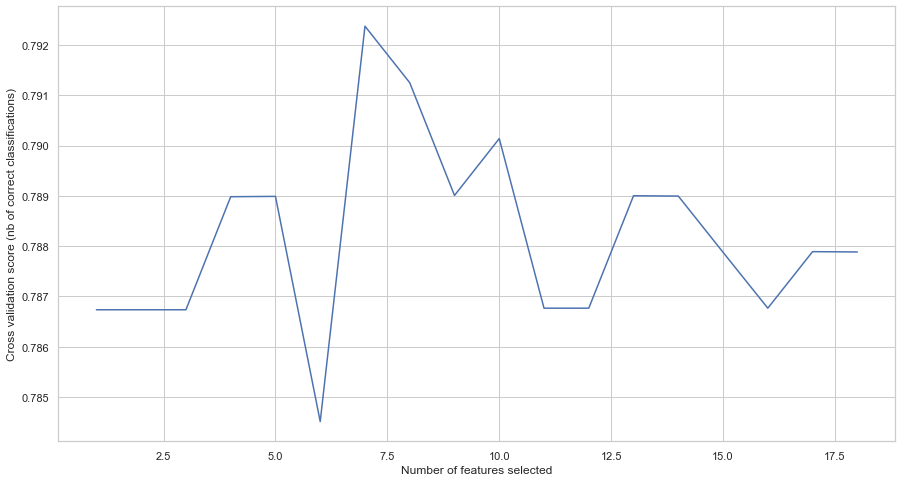

0.7912497646098802

In [523]:
rfecv_svc = rfecv_fit(svc, X_scaled, y)

In [382]:
X.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'female', 'male', 'A', 'B',
       'C', 'D', 'E', 'F', 'G', 'T', 'Cherbourg', 'Queenstown', 'Southampton'],
      dtype='object')

In [383]:
X.columns[rfecv.support_]

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'female', 'male', 'A', 'B', 'D', 'E',
       'F', 'G', 'T', 'Cherbourg', 'Southampton'],
      dtype='object')

In [526]:
X.columns[rfecv_xgb.support_]

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'female', 'A', 'B', 'C', 'D',
       'E', 'Cherbourg', 'Queenstown', 'Southampton'],
      dtype='object')

In [ ]:
# is there relation between cabin and pclass?
# is connection between mrs\miss